In [15]:
import numpy
from matplotlib import pyplot
from scipy.sparse import coo_matrix
%matplotlib inline

In [16]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [65]:
# Set parameters.
L = 1.0  # length of the rod
nx = 51  # number of locations on the rod
dx = L / (nx - 1)  # distance between two consecutive locations


# Define the locations along the rod.
x = numpy.linspace(0.0, L, num=nx)

alpha = 1.22e-3  #  thermal diffusivity of the rod
q = 0.0  # temperature gradient on the right side of the rod

# Set the initial temperature along the rod.
u0 = numpy.zeros(nx)
u0[0] = 100.0
N = 5
test = numpy.linspace(0.0, 4, num=5)
row1 = numpy.linspace(0.0, N-1, num=N)
col1 = numpy.linspace(0.0, N-1, num=N)
data01 = numpy.ones(N)
data1 = data01 * (2.0 + 1.0 / sigma)
data1[-1]= data1[1] = 1.0 + 1.0 / sigma
D = coo_matrix((data1, (row1, col1)), shape=(N, N)).toarray()
test
#coo_matrix((data, (row, col)), shape=(4, 4)).toarray()

array([0., 1., 2., 3., 4.])

In [18]:
nt = 1000
sigma = 0.5
dt = sigma *dx**2/alpha

In [27]:
def btcs(u0,nt,dt,dx,alpha,q = 0.0):
    u = u0.copy()
    sigma = alpha * dt / dx**2
    A = lhs_operator(u0.size - 2,sigma)
    
    for n in range(nt):
        # Update RHS vector.
        b = rhs_vector(u, sigma, q * dx)
        # Solve system for interior points.
        u[1:-1] = numpy.linalg.solve(A, b)
        # Find value at right boundary.
        u[-1] = u[-2] * q * dx
    return u 

In [28]:
def lhs_operator(N, sigma):
    # Setup the diagonal of the operator.
    D = numpy.diag((2.0 + 1.0 / sigma) * numpy.ones(N))
    # Setup the Neumann condition for the last element.
    D[-1, -1] = 1.0 + 1.0 / sigma
    # Setup the upper diagonal of the operator.
    U = numpy.diag(-1.0 * numpy.ones(N - 1), k=1)
    # Setup the lower diagonal of the operator.
    L = numpy.diag(-1.0 * numpy.ones(N - 1), k=-1)
    # Assemble the operator.
    A = D + U + L
  
    return A

In [71]:
def lhs_operator_sparse(N, sigma):
    row1  = numpy.linspace(0.0, N-1, num=N)
    col1  = numpy.linspace(0.0, N-1, num=N)
    data01 = numpy.ones(N)
    data1 = data01 * (2.0 + 1.0 / sigma)
    data1[-1]= 1.0 + 1.0 / sigma
    D = coo_matrix((data1, (row1, col1)), shape=(N, N)).toarray()
    row2  = numpy.linspace(1.0, N-1, num=N-1)
    col2  = numpy.linspace(0.0, N-2, num=N-1)
    data02 = numpy.ones(N-1)
    data2 = data02 * -1
    U = coo_matrix((data2, (row2, col2)), shape=(N, N)).toarray()
    row3  = numpy.linspace(0.0, N-2, num=N-1)
    col3  = numpy.linspace(1.0, N-1, num=N-1)
    data03 = numpy.ones(N-1)
    data3 = data03 * -1
    L = coo_matrix((data3, (row3, col3)), shape=(N, N)).toarray()
    A = D + U + L
    return A

In [72]:
A = lhs_operator(u0.size - 2,sigma)
A = lhs_operator_sparse(u0.size - 2,sigma)
A

array([[ 4., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  4., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  4., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  4., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  3.]])

In [31]:
def rhs_vector(u, sigma, qdx):
   
    b = u[1:-1] / sigma
    # Set Dirichlet condition.
    b[0] += u[0]
    # Set Neumann condition.
    b[-1] += qdx
    return b

In [32]:
nt = 1000
sigma = 0.5
dt = sigma *dx**2/alpha


In [33]:
u = btcs(u0,nt,dt,dx,alpha,q = 0.0)

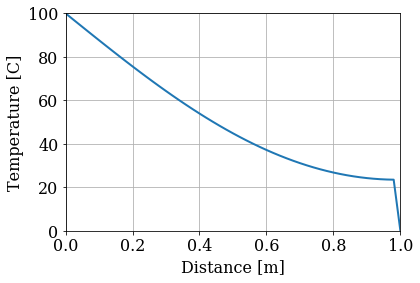

In [34]:
# Plot the temperature along the rod.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, u, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);